In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

df = pd.read_csv('zillow-carlifornia.csv')
df = df.rename(columns={'MedianSoldPrice_AllHomes.California':'MedianSoldPrice'})
df.index = pd.DatetimeIndex(df.Date)
df.dropna(inplace = True)

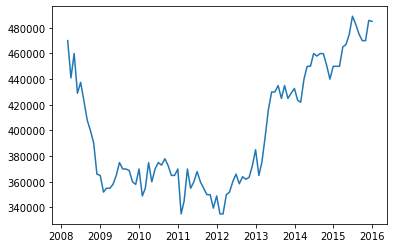

In [2]:
plt.plot(df['MedianSoldPrice'])
plt.show()

In [3]:
df.MedianSoldPrice.shift(0)

Date
2008-02-29    470000.0
2008-03-31    441000.0
2008-04-30    460000.0
2008-05-31    429000.0
2008-06-30    437500.0
                ...   
2015-08-31    475000.0
2015-09-30    470000.0
2015-10-31    470000.0
2015-11-30    485750.0
2015-12-31    485000.0
Name: MedianSoldPrice, Length: 95, dtype: float64

In [4]:
df_ts=pd.DataFrame()
for i in range(0, 12, 1):
    df_shift = df.MedianSoldPrice.shift(i).rename(f'MedianSoldPrice_{i}')
    df_ts = pd.concat([df_ts, df_shift],1)
for i in range(1, 5, 1):
    df_shift = df.MedianMortageRate.shift(i).rename(f'MedianMortageRate_{i}')
    df_ts = pd.concat([df_ts, df_shift],1)
for i in range(1, 5, 1):
    df_shift = df.UnemploymentRate.shift(i).rename(f'UnemploymentRate_{i}')
    df_ts = pd.concat([df_ts, df_shift],1)
df_ts = df_ts.dropna()
df_ts

,MedianSoldPrice_0,MedianSoldPrice_1,MedianSoldPrice_2,MedianSoldPrice_3,MedianSoldPrice_4,MedianSoldPrice_5,MedianSoldPrice_6,MedianSoldPrice_7,MedianSoldPrice_8,MedianSoldPrice_9,MedianSoldPrice_10,MedianSoldPrice_11,MedianMortageRate_1,MedianMortageRate_2,MedianMortageRate_3,MedianMortageRate_4,UnemploymentRate_1,UnemploymentRate_2,UnemploymentRate_3,UnemploymentRate_4
2009-01-31,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,429000.0,460000.0,441000.0,470000.0,5.79,5.89,5.64,6.03,6.2,5.6,5.7,6.5
2009-02-28,355000.0,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,429000.0,460000.0,441000.0,5.04,5.79,5.89,5.64,6.3,6.2,5.6,5.7
2009-03-31,355000.0,355000.0,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,429000.0,460000.0,4.72,5.04,5.79,5.89,7.8,6.3,6.2,5.6
2009-04-30,358000.0,355000.0,355000.0,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,429000.0,4.77,4.72,5.04,5.79,8.3,7.8,6.3,6.2
2009-05-31,365000.0,358000.0,355000.0,355000.0,352000.0,365000.0,366000.0,390000.0,400000.0,408000.0,423000.0,437500.0,4.64,4.77,4.72,5.04,8.8,8.3,7.8,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-31,475000.0,482750.0,489000.0,475000.0,467000.0,465000.0,450000.0,450000.0,450000.0,440000.0,450500.0,459750.0,3.87,3.85,3.73,3.79,5.3,5.6,5.4,5.4
2015-09-30,470000.0,475000.0,482750.0,489000.0,475000.0,467000.0,465000.0,450000.0,450000.0,450000.0,440000.0,450500.0,3.95,3.87,3.85,3.73,5.2,5.3,5.6,5.4
2015-10-31,470000.0,470000.0,475000.0,482750.0,489000.0,475000.0,467000.0,465000.0,450000.0,450000.0,450000.0,440000.0,3.87,3.95,3.87,3.85,5.1,5.2,5.3,5.6
2015-11-30,485750.0,470000.0,470000.0,475000.0,482750.0,489000.0,475000.0,467000.0,465000.0,450000.0,450000.0,450000.0,3.80,3.87,3.95,3.87,5.0,5.1,5.2,5.3


In [5]:
# df_ts = pd.concat([df_ts, df.MedianMortageRate.shift(1),df.UnemploymentRate.shift(1)],1)
# df_ts = df_ts.dropna()
# df_ts

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
x = df_ts[df_ts.columns[1:]]
y = df_ts[df_ts.columns[0]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
np.sqrt(MSE(y_pred,y_test)), MAE(y_pred,y_test), MAPE(y_pred,y_test)

(19881.415954796757, 16203.676470588236, 0.03580932624285439)

In [7]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
np.sqrt(MSE(y_pred,y_test)), MAE(y_pred,y_test), MAPE(y_pred,y_test)

(19298.864938998595, 15690.723438617699, 0.034602452132392825)

In [8]:
def ml_ts(model):
    y_pred = []
    cv_len = len(x_test)
    start = len(x_train)
    for t in range(cv_len):
        x_tr = x[:start+t-1]
        y_tr = y[:start+t-1]
        rf = model
        rf.fit(x_tr,y_tr)
        y_pred.append(rf.predict(np.array(x.iloc[start+t,:]).reshape(1,-1)))
    return y_pred,(np.sqrt(MSE(y_pred,y_test)), MAE(y_pred,y_test), MAPE(y_pred,y_test))

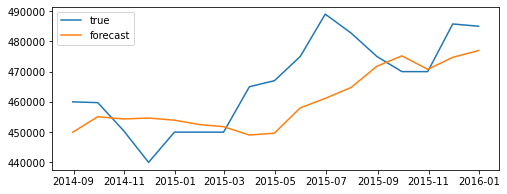

(12238.038893380031, 9757.5, 0.021255137732442423)


In [9]:
y_pred, metrics = ml_ts(RandomForestRegressor(n_estimators = 100))
plt.figure(figsize=(8,3))
plt.plot(y_test.index,y_test,label='true')
plt.plot(y_test.index,y_pred,label='forecast')
plt.legend()
plt.show()
print(metrics)

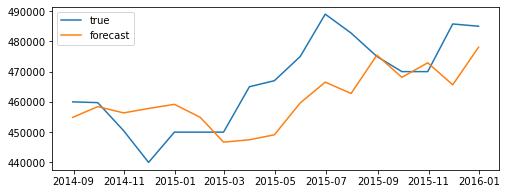

(12672.611986956168, 10176.700431461868, 0.022152790635296783)


In [10]:

y_pred, metrics = ml_ts(GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1))
plt.figure(figsize=(8,3))
plt.plot(y_test.index,y_test,label='true')
plt.plot(y_test.index,y_pred,label='forecast')
plt.legend()
plt.show()
print(metrics)

In [11]:
# !wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
# !unzip jena_climate_2009_2016.csv.zip